# Chem 30324, Spring 2017, Homework 8
Due April 3, 2017

## Quantum mechanics of an H atom: 
### Consider an excited hydrogen atom with a 2s$^1$ electron configuration. The 2s radial wavefunction is given by $$R_{2,0} = \frac{1}{\sqrt{2a_0^3}}(1-\rho/2)e^{-\rho/2}, \rho = r/a_0$$ where $a_0$ = bohr radius. (*Hint:* It’s easiest to solve the following using $a_0$ as the unit of length.)

### 1. Provide a hand sketch of the 3-D shape of a 2s wavefunction (“orbital”). Be sure to indicate the *sign* of the wavefunction in each region and the location(s) of nodes. How many radial and how many angular nodes does a 2s electron orbital have?

A 2s electron orbital has 1 radial node and 0 angular node. The graph is from http://www.grandinetti.org/electron-orbital-shapes.

![](http://www.grandinetti.org/resources/Teaching/Chem121/Lectures/OrbitalShapes/2sOrbital.gif)

### 2. Plot the radial probability function $P_{20}(r) = r^2\lvert R_{2,0}(r)\rvert^2$. Be sure to label both axes appropriately. (*Hint:* Stick with $a_0$ as the length unit.)

$P_{20}(r) = r^2\lvert R_{2,0}(r)\rvert^2 = r^2\frac{1}{2a_0^3}(1-\rho/2)^2e^{-\rho} = \frac{\rho^2}{2}(1-\rho/2)^2e^{-\rho}\frac{1}{a_0}$. Plot $\frac{\rho^2}{2}(1-\rho/2)^2e^{-\rho}$ vs $\rho$, the unit of P is $\frac{1}{a_0}$. The plot is shown in the solution of question number 5.

### 3. Determine and indicate on your plot $\langle r\rangle$, the expectation value of the distance of the electron from the nucleus.

$\langle r\rangle = \int_{0}^{\infty}rP_{20}dr = \int_{0}^{\infty}\frac{\rho^3}{2}(1-\rho/2)^2e^{-\rho}dr = a_0\int_{0}^{\infty}\frac{\rho^3}{2}(1-\rho/2)^2e^{-\rho}d\rho$

In [1]:
from sympy import * 
rho = symbols('rho')
I = integrate(rho**3/2*(1-rho/2)**2*exp(-rho),(rho,0,oo))
print(I)

6


The expectation value of the distance of the electron from the nucleus is 6$a_0$.

### 4. Determine and indicate on your plot  $r_{MP}$, the most probable distance of the electron from the nucleus.

Solve $\frac{dP_{20}(r)}{dr} = 0$ to get $r_{MP}$.

In [2]:
print(solve(diff(rho**2/2*(1-rho/2)**2*exp(-rho),rho),rho))

[0, 2, -sqrt(5) + 3, sqrt(5) + 3]


The equation has 4 roots. We can calculate P to examine them.

In [3]:
import numpy as np
for rho in [0, 2, -np.sqrt(5)+3, np.sqrt(5)+3]:
    print(rho**2/2*(1-rho/2)**2*exp(-rho))

0
0
0.0519197619104005
0.190967915526578


So, the most probable distance of the electron from the nucleus is $(\sqrt{5}+3)a_0$.

### 5. Determine and indicate on your plot the maximum classical distance of the electron from the nucleus in this orbital.

We know that at the limit of the classical region in the 2s (or any other) orbital the potential energy of the electron’s location is equal to the total energy of the orbital. We remember that the energy of an orbital level N in the hydrogen atom is given by the following equation. $$E_N = -\frac{\hbar^2}{2m_ea_o^2}\frac{1}{N^2}$$
We compare this value to the potential energy term in the Hamiltonian operator. $$P.E.(r) = -\frac{e^2}{4\pi\epsilon_0}\frac{1}{r}$$
Lastly, we set them equal to each other and solve for r. This will give us the distance from the nucleus at which the potential energy is equal to the total energy of the orbital. $$-\frac{\hbar^2}{2m_ea_o^2}\frac{1}{N^2} = -\frac{e^2}{4\pi\epsilon_0}\frac{1}{r}$$
We substitute in the bohr radius below, which yields the radial solution.$$a_0 = \frac{4\pi\epsilon_0\hbar^2}{m_ee^2}$$
$$r = 8a_0$$
Therefore, the forbidden region occurs for $r > 8a_0$.

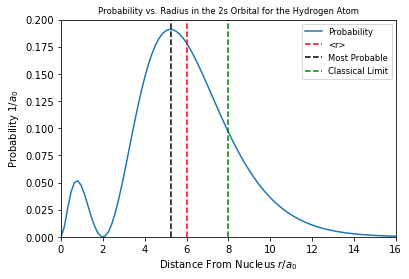

In [14]:
import numpy as np
import matplotlib.pyplot as plt

rho = np.linspace(0,16,100)
P = rho**2/2*(1-rho/2)**2*np.exp(-rho) # radial probability function
plt.plot(rho,P,label='Probability')

plt.xlim(0,16)
plt.ylim(0,0.2)
plt.xlabel('Distance From Nucleus $r/a_0$')
plt.ylabel('Probability $1/a_0$')
plt.title('Probability vs. Radius in the 2s Orbital for the Hydrogen Atom',fontsize = 'small')

plt.axvline(x=6,color='r',linestyle='--',label='<r>') # draw a vertical dash line
plt.axvline(x=3+np.sqrt(5),color='k',linestyle='--',label='Most Probable')
plt.axvline(x=8,color='g',linestyle='--',label='Classical Limit')
plt.legend(fontsize = 'small')
plt.show()

### 6. What is the probability of finding the electron beyond the classical distance? (Evaluate the necessary integral numerically.)

The probability that the electron is in the forbidden region: $\int_{8a_0}^{\infty}P_{20}(r)dr = \int_{8}^{\infty}\frac{\rho^2}{2}(1-\rho/2)^2e^{-\rho}d\rho$.

In [4]:
rho_ = symbols('rho_')
I = integrate(rho_**2/2*(1-rho_/2)**2*exp(-rho_),(rho_,8,oo))
print(I)

553*exp(-8)


In [7]:
print('The probability that the electron is in the forbidden region is {0:.3f}.'.format(553*np.exp(-8)))

The probability that the electron is in the forbidden region is 0.186.


### 7. Can a 2s electron undergo an allowed transition to a lower energy electronic state? If so, what frequency (in cm$^{-1}$) of light would be emitted?

For an electron to transit between orbitals there must be a change of ±1 in l. The lower energy state for 2s is 1s. For any s orbital, l=0. So, a 2s electron is not allowed to jump to a lower energy electronic state.

## Variations on the hydrogen atom
### The *variational principle* allows us to develop approximate solutions to the Schrodinger equation numerically. Here you will apply the variational principle to the H atom.  For this problem it is easiest to work in atomic units.  In these units, $\hbar$, $a_0$, and $4\pi\epsilon_0$ are all equal to 1 and the unit of energy is the Hartree, equivalent to 27.212 eV.  In atomic units the H atom Schrodinger equation is written:

$$\left \{-\frac{1}{2}\frac{d^2}{dr^2} - \frac{1}{r}\frac{d}{dr}-\frac{1}{r}+\frac{l(l+1)}{2r^2}  \right \}R(r) = ER(r)$$


### 8. Normalize the true 1s wavefunction, $R_{10}(r)=e^{-r}$.  Do not forget to include the $r^2$ integration factor.

$\tilde{R}_{10}(r) = Ce^{-r}$, solve normalization constant C by $$\int_{0}^{\infty}r^2C^2e^{-2r}dr = 1$$

In [8]:
from sympy import *

r = symbols('r')
I = integrate(r**2*exp(-2*r),(r,0,oo))
print(sqrt(1/I)) # normalization constant

2


So the normalized 1s wavefunction is $\tilde{R}_{10}(r) = 2e^{-r}$.

### 9. Is this 1s wavefunction an eigenfunction of the hydrogen Schrodinger equation?  What is the eigenvalue?  Recall that your answer will be in Hartree.

1s orbital: n = 1, l = 0: 
$$\hat{H} = -\frac{1}{2}\frac{d^2}{dr^2} - \frac{1}{r}\frac{d}{dr}-\frac{1}{r}$$ 
$$\hat{H}\tilde{R}_{10}(r) = -e^{-r} = (-\frac{1}{2})\tilde{R}_{10}(r)$$
So, this 1s wavefunction is an eigenfunction of the hydrogen Schrodinger equation, the eigenvalue is $-\frac{1}{2}$ Ha.

### 10. Suppose in a fit of panic you forget the 1s radial function when asked on an exam. Now wanting to leave the answer blank, you decide to guess something, and liking bell-shaped curves, you guess $R_{10}(r) = e^{-r^2}$.  Normalize this guess.

In [9]:
I = integrate(r**2*exp(-2*r**2),(r,0,oo))
pprint(sqrt(1/I))

  4 ___   
2⋅╲╱ 2 ⋅√2
──────────
  4 ___   
  ╲╱ π    


So the normalized 1s wavefunction is $\tilde{R}_{10}(r) = (\frac{128}{\pi})^{1/4}e^{-r^2}$.

### 11. Calculate the expectation value of the energy of your normalized guess.  Is it greater or less than the true value?

$$\hat{H} = -\frac{1}{2}\frac{d^2}{dr^2} - \frac{1}{r}\frac{d}{dr}-\frac{1}{r}$$ 
$$\frac{d}{dr}e^{-r^2} = -2re^{-r^2}$$
$$\frac{d^2}{dr^2}e^{-r^2} = -2e^{-r^2} + 4r^2e^{-r^2}$$
$$\hat{H}\tilde{R}_{10}(r) = C[-\frac{1}{2}(-2e^{-r^2} + 4r^2e^{-r^2})- \frac{1}{r}(-2re^{-r^2})-\frac{1}{r}e^{-r^2}] = C(-2r^2+3-1/r)e^{-r^2}$$
The expectation value of the energy:
$$\langle E\rangle = \int_{0}^{\infty}\tilde{R}_{10}(r)\hat{H}\tilde{R}_{10}(r)r^2dr = \int_{0}^{\infty} C^2(-2r^4+3r^2-r)e^{-2r^2} dr$$

In [10]:
E = 1/I*integrate((-2*r**4+3*r**2-r)*exp(-2*r**2),(r,0,oo))
print(E)

8*sqrt(2)*(-1/4 + 3*sqrt(2)*sqrt(pi)/32)/sqrt(pi)


In [22]:
import numpy as np
print('The expectation value of the energy is {0:.3f} Ha. It is greater than the true value.'.format(8*np.sqrt(2)*(-1/4 + 3*np.sqrt(2)*np.sqrt(np.pi)/32)/np.sqrt(np.pi)))

The expectation value of the energy is -0.096 Ha. It is greater than the true value.


### 12. What does the variational principle say about the expectation value of the energy of your guess as you vary a parameter $\gamma$ in your guess, $R_{10}=e^{-\gamma r^2}$?  Suggest a strategy for determining the "best" $\gamma$.

The variational principle says true wavefunction energy is always lower bound on energy of any trial wavefunction. We can get the "best" $\gamma$ by optimizing the wavefunction with respect to variational parameter: $$\frac{\partial\langle E\rangle}{\partial\gamma} = 0$$

### 13. *Extra credit*: Determine the best value of $\gamma$.  Show and carefully justify your work to receive credit.

Normalize $R_{10}$: $\int_{0}^{\infty}r^2C^2e^{-2\gamma r^2}dr = 1$

$\langle E\rangle = \int_{0}^{\infty}\tilde{R}_{10}(r)\hat{H}\tilde{R}_{10}(r)r^2dr = \int_{0}^{\infty} C^2(-2\gamma^2 r^4+3\gamma r^2-r)e^{-2\gamma r^2} dr$

In [17]:
gamma = symbols('gamma',positive=True)
C_squared = 1/integrate(r**2*exp(-2*gamma*r**2),(r,0,oo)) # normalization constant squared
E_guess = C_squared*integrate((-2*gamma**2*r**4+3*gamma*r**2-r)*exp(-2*gamma*r**2),(r,0,oo)) # expectation value of energy
print(E_guess)
print('The best value of gamma is ')
print(solve(diff(E_guess,gamma),gamma)) # solve dE/dgamma = 0

8*sqrt(2)*gamma**(3/2)*(-1/(4*gamma) + 3*sqrt(2)*sqrt(pi)/(32*sqrt(gamma)))/sqrt(pi)
The best value of gamma is 
[8/(9*pi)]


In [18]:
gamma = 8/(9*np.pi)
print('The expectation value of the energy is {0:.3f} Ha.'.format(8*np.sqrt(2)*gamma**(3/2)*(-1/(4*gamma) + 3*np.sqrt(2)*np.sqrt(np.pi)/(32*np.sqrt(gamma)))/np.sqrt(np.pi)))

The expectation value of the energy is -0.424 Ha.


## Many-electron atoms:
### Oxygen (O) is the eighth atom on the periodic table and has 6 valence electrons.

### 14. Write the ground state atomic configuration of oxygen.

$1s^{2}2s^{2}2p^4$

### 15. Provide *one possible set* of quantum numbers ($n, l, m_l , m _s$) for each of the valence electrons in the atom. What is the ground state *spin multiplicity* of O?

One possible set of quantum numbers:

| $n$ | $l$ | $m_l$| $m_s$ |
|--------------|---------------|-----------------------------|----------|
| 1 | 0 | 0 | +1/2 |
| 1 | 0 | 0 | -1/2 | 
| 2 | 0 | 0 | +1/2 |
| 2 | 0 | 0 | -1/2 |
| 2 | 1 | 0 | +1/2 |
| 2 | 1 | 0 | -1/2 |
| 2 | 1 | -1 | +1/2 |
| 2 | 1 | 1 | +1/2 |

We know that the spin of an atom is calculated by summing up the values of ms over the entire atom. We find that the ground state oxygen atom has a spin of 1. We can then determine the multiplicity by multiplying the spin by 2, and adding 1 to it. Therefore the ground state spin multiplicity of an oxygen atom is 3 (this will always be equal to the number of unpaired electrons +1).

### 16. *Qualitatively* compare the energies necessary to remove a 1s electron from O and from sulfur (S), one row below O in the periodic table. Explain your answer. (Note that the measurement of these energies is the basis of X-ray core-level spectroscopy.)

It will require much more energy to remove the 1s electron from the sulfur atom than from an oxygen atom. This is due to the great increase in the coulomb potential by increasing the number of protons in the nucleus. Additionally, since we are explicitly considering the 1s orbital, which is not shielded, the electrons will feel the full effect of the extra charge in the nucleus, while the effect will be decreased in further out orbitals due to shielding (i.e. the difference in the energy levels of the 2p orbitals will not be as great as the difference in the 1s orbitals).

### 17. *Qualitatively* compare the ionization energies (energies to remove a valence p electron) from O and from S, one row below O in the periodic table. Explain your answer.

Sulfur has a lower first ionization energy than oxygen. Ionization is easiest from the highest energy orbitals, and the n = 3 p orbitals of sulfur are higher in energy than the n = 2 p orbitals of oxygen.

### 18. *Qualitatively* compare the ionization energies (energies to remove a valence p electron) from O and from fluorine (F), one column to the right of O in the periodic table. Explain your answer.

The first ionization energy of fluorine is greater than oxygen. Fluorine has one more proton and one more 2p electron than oxygen. Electrons in the same subshell are ineffective at shielding each other, so the 2p electrons in fluorine feel a greater effective nuclear charge than do those in oxygen.

### 19. Show that a 2s hydrogenic orbital approaches closer to the nucleus than the 2p, by comparing the probability of finding either electron within 1 atomic unit of the nucleus. In atomic units, the 2s and 2p radial wavefunctions are given by:
$$R_{2,0} = \frac{1}{\sqrt{2}}(1-r/2)e^{-r/2}$$
$$R_{2,1} = \frac{1}{2\sqrt{6}}r e^{-r/2}$$

### Remember to construct the radial probability functions correctly.

$P_{2s} = \int_{0}^{1}r^2R_{2,0}^2 dr = \int_{0}^{1}\frac{r^2}{2}(1-r/2)^2e^{-r}dr$

$P_{2p} = \int_{0}^{1}r^2R_{2,1}^2 dr = \int_{0}^{1}\frac{1}{24}r^4e^{-r}dr$

In [19]:
r = symbols('r')
P_1 = integrate(r**2/2*(1-r/2)**2*exp(-r),(r,0,1))
P_2 = integrate(1/24*r**4*exp(-r),(r,0,1))
print(P_1,P_2)

-21*exp(-1)/8 + 1 -2.70833333333333*exp(-1) + 1.0


In [21]:
print('The probability of finding electron within 1 atomic unit of the nucleus of 2s orbital is {0:.3f}, the probability of 2p orital is {1:.3f}.'.format(-21*np.exp(-1)/8 + 1, -2.70833333333333*np.exp(-1) + 1.0))

The probability of finding electron within 1 atomic unit of the nucleus of 2s orbital is 0.034, the probability of 2p orital is 0.004.


Therefore, an electron in a 2s orbital is much more likely to be within 1 bohr radius of the nucleus, than an electron in a 2p orbital.